# Analysis of testData3

**Author**: Jacopo Ventura

**Date**: 27th October 2017

A predictive model for the feature $t$ is build through the following steps:

1. descriptive statistics of data and first plots to get insights
2. check linear correlation between features
3. separate training and test sets
4. train few machine learning algorithms and select the best one 
5. test the algorithm on the test dataset


In [1]:
# Import packages for data analysis
import os    # OS module provides the interface with the operating system and allows to use it
import tarfile
from six.moves import urllib
import pandas as pd     # Pandas: python library for large data manipulation and analysis. 
                        # Dataset will be saved as Pands dataset
import numpy as np
import matplotlib.pyplot as plt

# this command is very important in Jupyter: figures must be showed directly in the notebook!!!
%matplotlib inline

import seaborn as sns

# disable warnings
import warnings
warnings.filterwarnings("ignore")

# step 1: acquire dataset
data_path='C:/Users/jacopo/Desktop/schaeffler/testData3.csv'
dataset = pd.read_csv(data_path,sep=';')   # dataset as pandas dataset

print('Overview of the dataset: size of dataset and type of data:\n')
dataset.info()


Overview of the dataset: size of dataset and type of data:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
a    1000 non-null float64
b    1000 non-null float64
c    1000 non-null float64
d    1000 non-null float64
e    1000 non-null int64
t    1000 non-null float64
dtypes: float64(5), int64(1)
memory usage: 47.0 KB


### Step 1: descriptive statistics of data and first plots

We now get the first insights on data by performing descriptive statistics.

In [2]:
print('\nDescriptive statistics of the dataset:')
dataset.describe()


Descriptive statistics of the dataset:


,a,b,c,d,e,t
count,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.00000,1.000000e+03
mean,170.114480,187.521820,40.401890,2.457218e+06,2.97300,-7.482447e+11
std,63.522191,308.804257,22.744745,2.208715e+06,1.43399,1.987179e+12
min,60.110000,-496.390000,0.080000,9.125718e+04,1.00000,-1.267136e+13
25%,115.222500,-45.980000,20.187500,7.578261e+05,2.00000,-1.523758e+12
50%,169.555000,194.645000,39.910000,1.630716e+06,3.00000,-4.585529e+11
75%,224.187500,424.872500,60.512500,3.504773e+06,4.00000,-8.278034e+10
max,279.540000,857.980000,79.830000,9.752308e+06,5.00000,1.141141e+13


The dataset consists of 1000 instances composed by 6 attributes ( $a$ , $b$ , $c$, $d$, $e$, $f$) and the target attribute  $t$. Moreover, **the dataset is complete**, meaning that no missing data (NaN) are present.

The target feature $t$ is continuous numerical. Therefore, predicting $t$ is a **regression task**. Furthermore, $t$ assumes larger values, which are several orders of magnitude larger than the independent variables. 

The features $e$ is numerical discrete variables. We have no information if this feature is categorical or numerical. However, it is reasonable to assume $e$ numerical discrete. In fact, $e$ could represent a score / rank as it assumes integer values in the interval $[1,5]$. 

Finally, features $d$ is *six orders of magnitude* larger than the feature $e$.

Counter({5: 209, 1: 209, 2: 205, 3: 199, 4: 178})


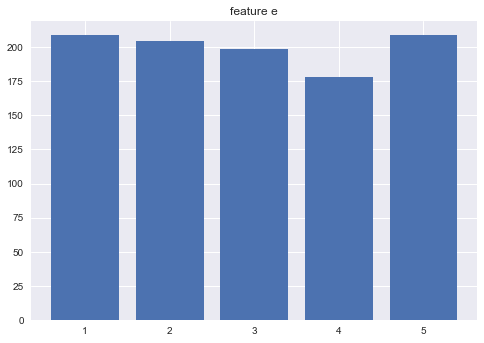

In [3]:
# frequencies of discrete numerical values
import collections

# frequecies of discrete numerical feature
def freq_discrete_feature(feature):
    
    feature_freq = collections.Counter(feature)
    print(feature_freq)
    
    dim = len(feature_freq)
    dim_0 = 0
    if feature_freq[0]==0:
        dim = dim + 1
        dim_0 = 1
        
    # create output
    feature_freq_ordered = [feature_freq[i] for i in range(dim_0,dim)]
    feature_ordered = [i for i in range(dim_0,dim)]
    
    return feature_ordered, feature_freq_ordered

feature_e_ordered, feature_e_freq_ordered = freq_discrete_feature(dataset['e'].values) 

plt.bar(feature_e_ordered,feature_e_freq_ordered)
plt.title('feature e')
plt.xticks(feature_e_ordered) 
plt.show()


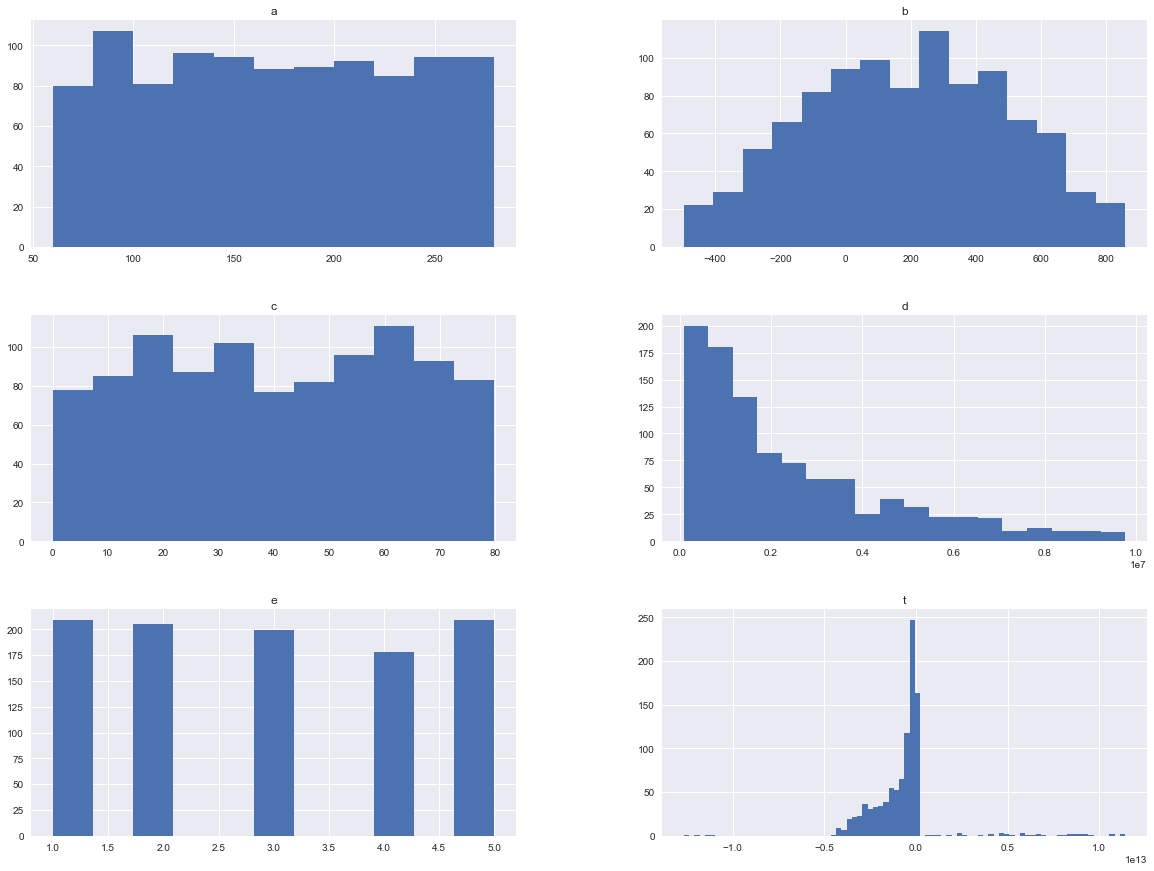

In [4]:
# Histograms of data
dataset.hist(bins='auto', figsize=(20,15))
plt.show()

The previous histogram shows that the feature $d$ has **positive skewness**.

### Step 2: Check linear correlation through the Pearson's r coefficient

Let us now check the linear correlation between variables using Pearsons' r. 

As we can observe from the correlation matrix, **features $b$ and $bc$ are strongly correlated, and features $a,d,e$ are also highly correlated**.

Pearsons r correlation coefficient for t:
t    1.000000
e   -0.001014
b   -0.047086
c   -0.053808
d   -0.394547
a   -0.487020
Name: t, dtype: float64
Pearsons r correlation coefficient for b:
b    1.000000
c    0.885643
a    0.042564
t   -0.047086
d   -0.231926
e   -0.467775
Name: b, dtype: float64
Pearsons r correlation coefficient for d:
d    1.000000
a    0.752464
e    0.539173
c    0.020874
b   -0.231926
t   -0.394547
Name: d, dtype: float64
Display correlation matrix


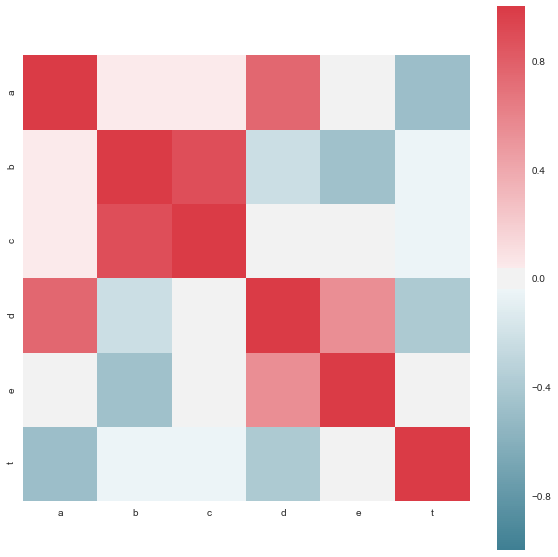

In [5]:
# generate scatter matrix
from pandas.plotting import scatter_matrix

# check linear correlation through Pearson's r
print('Pearsons r correlation coefficient for t:')
corr_matrix = dataset.corr()
print(corr_matrix["t"].sort_values(ascending=False))

print('Pearsons r correlation coefficient for b:')
print(corr_matrix["b"].sort_values(ascending=False))

print('Pearsons r correlation coefficient for d:')
print(corr_matrix["d"].sort_values(ascending=False))

print('Display correlation matrix')
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr_matrix, 
            mask=np.zeros_like(corr_matrix, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

Scatter matrix of data:


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FA68FBF860>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001FA692A9C18>]], dtype=object)

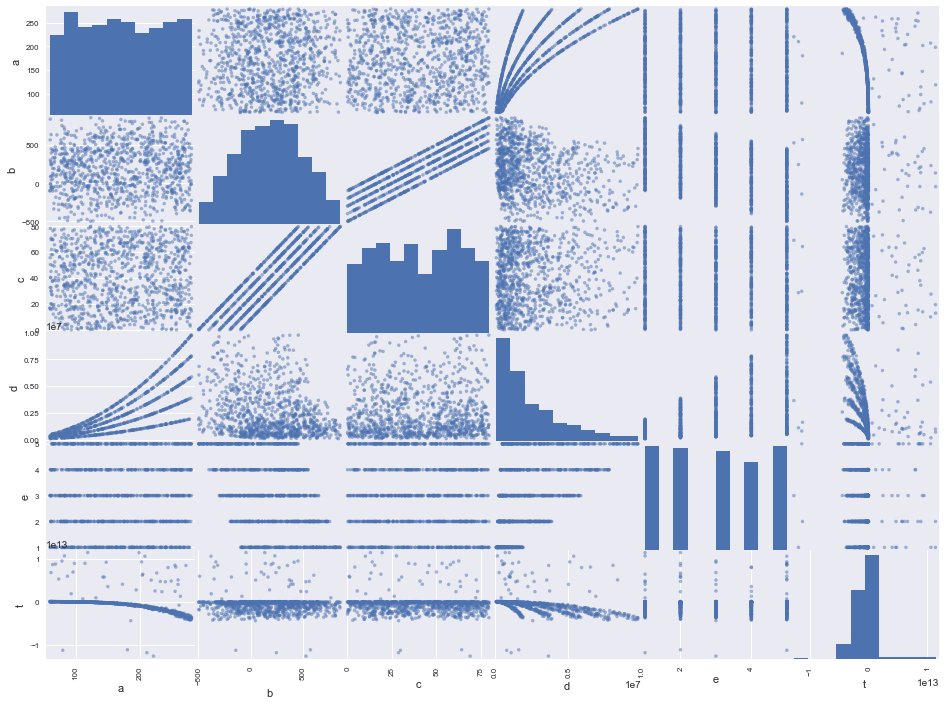

In [6]:
# generate scatter matrix
from pandas.plotting import scatter_matrix

print('Scatter matrix of data:')
scatter_matrix(dataset, figsize=(16, 12))

The scatter matrix shows the correlation between features. Some patterns are present for $(a,d)$ and $(b,c)$. 

In [7]:
# Generation of train and test dataset by random sampling
from sklearn.cross_validation import train_test_split
 
Features_X = dataset[['a','b','c','d','e']]
Label_Y = dataset['t']
train_Features, test_Features, train_Label, test_Label = train_test_split(Features_X, 
                                                                            Label_Y, 
                                                                            test_size=0.2,
                                                                            random_state=42)

print(len(train_Features), "train +", len(test_Features), "test")


800 train + 200 test


D:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [8]:
from sklearn.preprocessing import StandardScaler

scaler_Features = StandardScaler().fit(train_Features)
scaler_Label = StandardScaler().fit(train_Label)

train_Features_scaled = scaler_Features.transform(train_Features)
train_Label_scaled = scaler_Label.transform(train_Label)

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


### Step 4: training of Machine Learning models

The following Machine Learning models are trained:

1. Ridge regression
2. Support Vector Regression
3. Random Forest
4. kNN

Notably, the correlations between independent variables may cause instability in the calculation of the coefficients of the linear regression function (Least squares, inversion of the feature matrix X). Therefore, Ridge regression is used to reduce instabilities. 


In [9]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

# options for cross validation
score_cross_val = "neg_mean_squared_error"
N_split = 10

# function to display results from cross validation
def display_scores(scores):
    print('Performance measure for cross validation: root mean squared error RMSE')
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [18]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="auto").fit(train_Features_scaled, train_Label_scaled)

# cross validation on the training dataset
scores = cross_val_score(ridge_reg,train_Features_scaled,
                         train_Label_scaled,
                         scoring=score_cross_val, 
                         cv=N_split)

lin_rmse_scores = np.sqrt(-scores)
display_scores(lin_rmse_scores)



Performance measure for cross validation: root mean squared error RMSE
Mean: 0.834908036639
Standard deviation: 0.273797047243


In [24]:
# 2: SVM
from sklearn.svm import SVR
svr_reg = SVR(kernel='rbf',
              C = 1,
              gamma = 'auto')

svr_reg.fit(train_Features_scaled, train_Label_scaled)

# cross validation on the training dataset
scores = cross_val_score(svr_reg,train_Features_scaled,
                         train_Label_scaled,
                         scoring=score_cross_val, 
                         cv=N_split)

tree_rmse_scores = np.sqrt(-scores)
display_scores(tree_rmse_scores)

Performance measure for cross validation: root mean squared error RMSE
Mean: 0.816962206648
Standard deviation: 0.307823423164


In [14]:
# 3: Random Forest
from sklearn.ensemble import RandomForestRegressor

# train Random Forest
forest_reg = RandomForestRegressor(n_estimators = 20,
                                   max_depth=None,   
                                   min_weight_fraction_leaf=0.0, 
                                   max_features='auto', 
                                   bootstrap=True
                                  )


forest_reg.fit(train_Features_scaled, train_Label_scaled)


# cross validation on the training dataset
scores = cross_val_score(forest_reg,train_Features_scaled,
                         train_Label_scaled,
                         scoring=score_cross_val, 
                         cv=N_split)

forest_rmse_scores = np.sqrt(-scores)
display_scores(forest_rmse_scores)

Performance measure for cross validation: root mean squared error RMSE
Mean: 0.91633590538
Standard deviation: 0.23229207183


In [13]:
# 4: kNN
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor(n_neighbors=5)

knn_reg.fit(train_Features_scaled, train_Label_scaled)

# cross validation on the training dataset
scores = cross_val_score(knn_reg,train_Features_scaled,
                         train_Label_scaled,
                         scoring=score_cross_val, 
                         cv=N_split)

forest_rmse_scores = np.sqrt(-scores)
display_scores(forest_rmse_scores)

Performance measure for cross validation: root mean squared error RMSE
Mean: 0.93105460218
Standard deviation: 0.213436545646


The chosen machine learning algorithm is Support Vector regression with rbf kernel since it ensures the lowest RMSE after cross validation.

## Step 5: test the algorithm on the test dataset

In [25]:
svr_reg_final = svr_reg

y_predicted = svr_reg_final.predict(train_Features_scaled)

print('\nPerformance (RMSE) on the train dataset:')
print(np.sqrt(mean_squared_error(train_Label_scaled,y_predicted)))



# test on the test dataset
test_Features_scaled = scaler_Features.transform(test_Features)
test_Label_scaled = scaler_Label.transform(test_Label)
y_predicted_test = svr_reg_final.predict(test_Features_scaled)

print('\nPerformance (RMSE) on the test dataset:')
print(np.sqrt(mean_squared_error(test_Label_scaled,y_predicted_test)))



Performance (RMSE) on the train dataset:
0.867654729533

Performance (RMSE) on the test dataset:
0.962518678582


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


Performance on the test dataset are slightly worse